<a href="https://colab.research.google.com/github/frankyehtw/hello-world/blob/master/%E3%80%8Cex01_loss_function_selection_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()      # 上傳檔案到 Colab
!ls  

import numpy as np
np.random.seed(1337)

''' Read input files '''
my_data = np.genfromtxt('pkgo_city66_class5_v1.csv', delimiter=',',skip_header=1)

''' The first column to the 199th column is used as input features '''
X_train = my_data[:,0:200]
X_train = X_train.astype('float32')

''' The 200-th column is the answer '''
y_train = my_data[:,200]
y_train = y_train.astype('int')

''' Convert to one-hot encoding '''
import tensorflow
Y_train = tensorflow.keras.utils.to_categorical(y_train,5)

''' Shuffle training data '''
from sklearn.utils import shuffle
X_train,Y_train = shuffle(X_train,Y_train,random_state=100)

Saving pkgo_city66_class5_v1.csv to pkgo_city66_class5_v1.csv
pkgo_city66_class5_v1.csv  sample_data


In [ ]:
print(y_train[3])
print(Y_train[3])


1
[0. 0. 0. 0. 1.]


### Step 1: 引入需要的函式
- 從 keras.models 裡 import Sequential
- 從 keras.layers 裡 import Dense 和 Activation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

### Step 2: 宣告模型架構
建立一個 Fully Connected Neural Network (input_dim = 200, output_dim = 5)
- 宣告一個 Sequential 的模型
- 加入 1st dense layer = 128 neurons using 'sigmoid' activation function
- 加入 2nd dense layer = 256 neurons using 'sigmoid' activation function
- 加入 3rd dense layer (output) = 5 neurons using 'softmax' activation function

In [ ]:
# Step 2 HERE
# print 'Building a model whose loss function is categorical_crossentropy'
''' For categorical_crossentropy '''
model_ce = Sequential()
model_ce.add(Dense(128, input_dim=200))
model_ce.add(Activation('sigmoid'))
model_ce.add(Dense(256))
model_ce.add(Activation('sigmoid'))
model_ce.add(Dense(5))
model_ce.add(Activation('softmax'))

In [ ]:
# print 'Building a model whose loss function is mean_squared_error'
''' For mean_squared_error '''
model_mse = Sequential()
model_mse.add(Dense(128, input_dim=200 ))
model_mse.add(Activation('sigmoid'))
model_mse.add(Dense(256))
model_mse.add(Activation('sigmoid'))
model_mse.add(Dense(5))
model_mse.add(Activation('softmax'))

### Step 3: 指定模型的優化器 (optimizer) 與 目標函數 (objective/loss function)
- 從 keras.optimizers import SGD
- 建立一個 SGD optimizer, learing rate=0.01 (lr=0.01)
- 在 compile model 時，指定優化器與 loss function='categorical_crossentropy'

In [ ]:
# Step 3 HERE
''' Set up the optimizer '''
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad
sgd = SGD(lr=0.01,momentum=0.0,decay=0.0,nesterov=False)

In [ ]:
# Do it here
''' please use categorical_crossentropy as loss'''
model_ce.compile(loss='categorical_crossentropy',
				optimizer='SGD',
				metrics=['accuracy'])

# Do it here
''' please use mean_squared_error as loss'''
model_mse.compile(loss= 'mse',
              optimizer='SGD',
              metrics=['accuracy'])

### Step 4: 設定 batch size 和 number of epochs

In [ ]:
# Step 4 HERE
batch_size = 16
epochs = 30

### Step 5: 訓練模型 model.fit 並給入訓練資料和參數

In [ ]:
# Step 5 HERE

In [ ]:
'''Fit models and use validation_split=0.1 '''
history_ce = model_ce.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)

In [ ]:
history_mse = model_mse.fit(X_train, Y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=0,
                            shuffle=True,
                            validation_split=0.1)

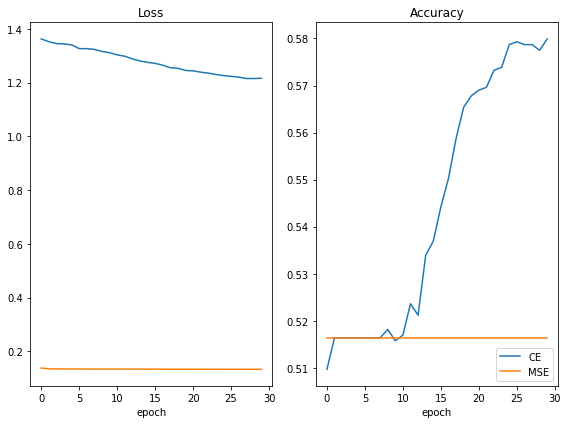

In [ ]:
# Access the loss and accuracy in every epoch
loss_ce	= history_ce.history.get('loss')
acc_ce 	= history_ce.history.get('accuracy')
loss_mse= history_mse.history.get('loss')
acc_mse = history_mse.history.get('accuracy')

# Visualize the loss and accuracy of both models
import matplotlib.pyplot as plt
plt.figure(0,figsize=(8,6))
plt.subplot(121)
plt.plot(range(len(loss_ce)), loss_ce,label='CE')
plt.plot(range(len(loss_mse)), loss_mse,label='MSE')
plt.title('Loss')
plt.xlabel("epoch")
plt.subplot(122)
plt.plot(range(len(acc_ce)), acc_ce,label='CE')
plt.plot(range(len(acc_mse)), acc_mse,label='MSE')
plt.title('Accuracy')
plt.xlabel("epoch")
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
plt.savefig('01_lossFuncSelection.png',dpi=300,format='png')
plt.close()